In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfx = pd.read_csv('hardworkpayoff/Linear_X_Train.csv')
dfy = pd.read_csv('hardworkpayoff/Linear_Y_Train.csv')

In [5]:
x = dfx.values
y = dfy.values
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape)
print(y.shape)

(3750,)
(3750,)


### Visualizing and processing the data

In [6]:
### Normalising the data
# plt.scatter(x,y)
# X = (x-x.mean())/(x.std())
# Y = y
# plt.scatter(X,Y)
# plt.show()

### Gradient Descent Algorithmn

In [20]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error+= (hx-Y[i])**2
    
    return error

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] +=(hx-Y[i])*X[i]
    return grad

def gradientDescent(X,Y,learning_rate=0.0005):
    theta = np.array([0.0,0.0])
    itr = 0
    max_itr = 100
    error_list = []
    theta_list = []
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0]-learning_rate*grad[0]
        theta[1] = theta[1]-learning_rate*grad[1]
        itr+=1
        
    return theta,error_list,theta_list
    

In [21]:
final_theta, error_list ,theta_list= gradientDescent(x,y)
print(final_theta)

[ 3.69148997 80.57385371]


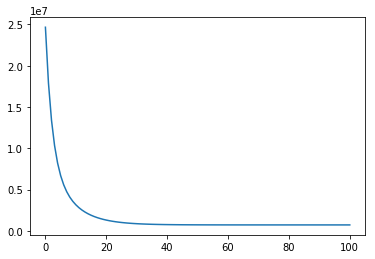

In [22]:
plt.plot(error_list)
plt.show()

In [23]:
print(final_theta)

[ 3.69148997 80.57385371]


In [24]:
dxtest = pd.read_csv('hardworkpayoff/Linear_X_Test.csv')

In [25]:
xtest = dxtest.values

In [26]:
xtest = xtest.reshape((-1,))

In [27]:
print(xtest.shape)

(1250,)


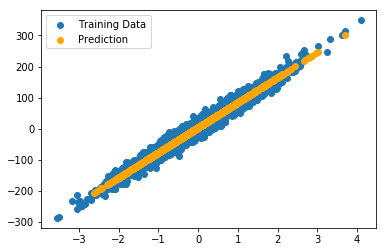

In [30]:
plt.scatter(x,y,label='Training Data')
plt.scatter(xtest,hypothesis(xtest,final_theta),color='orange',label = 'Prediction')
plt.legend()
plt.show()

In [33]:
#Storing result using csv

In [34]:
csv_data = [['y']]
for n in range(xtest.shape[0]):
    pred = hypothesis(xtest[n],final_theta)
    csv_data.append([int(pred)])

In [36]:
file = open('sample3.csv','w+')
for row in csv_data:
    file.write(str(row[0])+'\n')
    
file.close()